# Data Preprocessing

# Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

E:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Call The Dataset

In [2]:
power = pd.read_csv('PowerPlant.csv')
power.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# 9568 row and 5 colums

In [3]:
power.shape

(9568, 5)

# Drop & Convert Columns

In [4]:
power['AT']=power['AT'].astype(int)
power['V'] = power['V'].astype(int)
power['AP'] = power['AP'].astype(int)
power['RH'] = power['RH'].astype(int)
power['PE']=power['PE'].astype(int)


power.head(5)
# power.columns

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


Info About Dataset

In [5]:
power.info

<bound method DataFrame.info of       AT   V    AP  RH   PE
0      8  40  1010  90  480
1     23  58  1011  74  445
2     29  56  1007  41  438
3     19  49  1007  76  453
4     11  40  1017  97  464
...   ..  ..   ...  ..  ...
9563  15  48  1011  72  462
9564  33  77  1010  59  432
9565  15  43  1014  78  465
9566  17  59  1018  94  450
9567  23  51  1011  71  451

[9568 rows x 5 columns]>

In [6]:
print(power.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [7]:
power.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.157922,53.808737,1012.767140,72.821175,453.871133
std,7.460963,12.703648,5.948994,14.610196,17.067651
min,1.000000,25.000000,992.000000,25.000000,420.000000
25%,13.000000,41.000000,1009.000000,63.000000,439.000000
50%,20.000000,52.000000,1012.000000,74.000000,451.000000
75%,25.000000,66.000000,1017.000000,84.000000,468.000000
max,37.000000,81.000000,1033.000000,100.000000,495.000000


<Figure size 600x600 with 0 Axes>

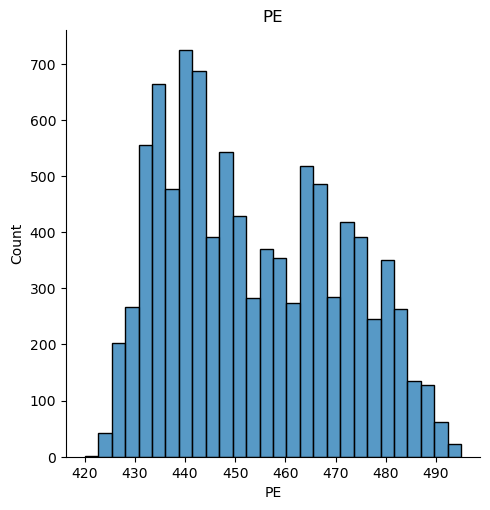

In [8]:
plt.figure(figsize=(6,6))
sns.displot(power['PE'])
plt.title('PE')
plt.show()

# Splitting The dataset into Features & Dependent

In [9]:
X = power.drop(columns='PE' , axis=1).values
y = power['PE'].values
print(X)
print(y)

[[   8   40 1010   90]
 [  23   58 1011   74]
 [  29   56 1007   41]
 ...
 [  15   43 1014   78]
 [  17   59 1018   94]
 [  23   51 1011   71]]
[480 445 438 ... 465 450 451]


# Correlation

<Axes: >

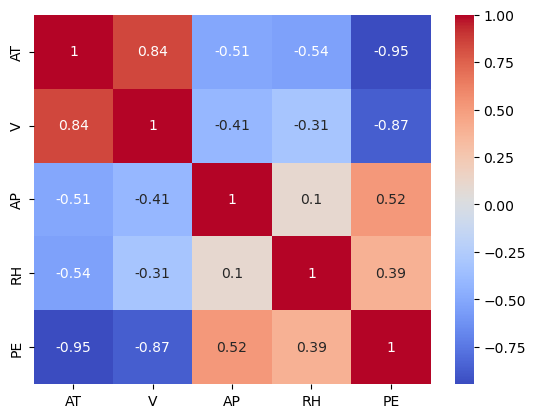

In [10]:
correlation_matrix = power.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')

# Splitting The Dataset into X_train, X_test, y_train, y_test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(7654, 4)
(1914, 4)
(9568, 4)


# Feature Scaling

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[ 0.78150124  0.72256351 -0.29349626 -0.47772454]
 [ 0.91525519  1.27336321 -0.96911141  0.82557282]
 [ 0.91525519  1.50942023  0.38211889  0.82557282]
 ...
 [-0.15477642 -0.85114992  0.38211889 -0.82069753]
 [ 0.91525519  1.11599187 -0.46240005 -0.47772454]
 [-1.75982384 -1.16589261  1.90225298  0.89416742]]
[[ 1.33016528  0.25431742 -1.3014818  -1.03595782]
 [ 0.78939715  1.35844728 -0.80631161  0.32283832]
 [-0.2921391  -0.77094603  1.99965279 -0.15274033]
 ...
 [-0.6977152  -1.16527812 -0.31114142 -0.08480052]
 [ 1.33016528  1.35844728 -0.80631161 -0.35655975]
 [-0.2921391  -0.29774751  0.3490855   1.13811601]]


# Linear Regression

In [13]:
reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred_train_reg = reg.predict(X_train)
train_score = reg.score(X_train , y_train)
print("train_score : " , train_score)

reg.fit(X_test , y_test)
y_pred_test_reg = reg.predict(X_test)
test_score = reg.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9266472413543689
test_score :  0.9304123574015184


In [14]:
print(y_pred_test_reg[:3])
print(y_test[:3])

[435.43510558 437.04714927 461.55833193]
[433 438 458]


In [15]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9568, 4)
(7654, 4)
(1914, 4)


In [16]:
score_r2 = metrics.r2_score(y_test , y_pred_test_reg)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9304123574015184


In [17]:
# mse = mean_squared_error(y_test, y_pred_test_reg)
# print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_test_reg)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 3.5709624720882642


Text(0, 0.5, 'Predicted PE')

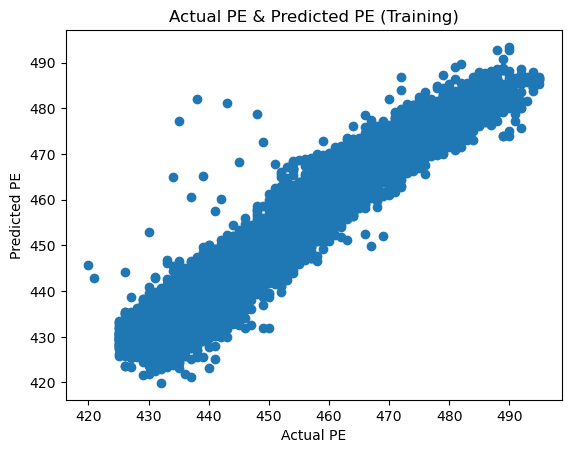

In [18]:
plt.scatter(y_train , y_pred_train_reg)
plt.title("Actual PE & Predicted PE (Training)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

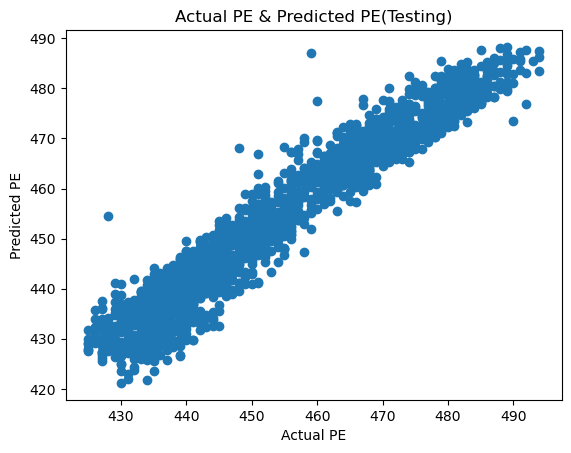

In [19]:
plt.scatter(y_test , y_pred_test_reg)
plt.title("Actual PE & Predicted PE(Testing)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [20]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predictions Value': y_pred_test_reg, 'Difference': y_test - y_pred_test_reg})
print(pred_y_df.head(20))


    Actual Value  Predictions Value  Difference
0            433         435.435106   -2.435106
1            438         437.047149    0.952851
2            458         461.558332   -3.558332
3            480         475.375748    4.624252
4            441         436.031317    4.968683
5            454         459.299067   -5.299067
6            483         480.344998    2.655002
7            478         478.529215   -0.529215
8            434         438.605757   -4.605757
9            470         469.878725    0.121275
10           450         448.122767    1.877233
11           455         454.792197    0.207803
12           489         484.524202    4.475798
13           471         471.076810   -0.076810
14           480         473.834144    6.165856
15           432         435.102313   -3.102313
16           473         476.805651   -3.805651
17           432         434.141569   -2.141569
18           429         432.597457   -3.597457
19           450         451.958925   -1

In [21]:
input_data = (5 , 60 , 1007 , 41)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = reg.predict(input_data_reshape)
print('the PE is ' , prediction[0])

the PE is  571.518523960413


# KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 6)

knn_scaled = knn.fit(X_train , y_train)
y_pred_train_knn = knn_scaled.predict(X_train)
train_score = knn_scaled.score(X_train , y_train)
print("train_score : " , train_score)

knn_scaled.fit(X_test , y_test)
y_pred_test_knn = knn_scaled.predict(X_test)
test_score = knn_scaled.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9628851077218905
test_score :  0.9548260138310907


In [23]:
print(y_pred_test_knn[:3])
print(y_test[:3])

[436.5        436.5        462.16666667]
[433 438 458]


In [24]:
score_r2 = metrics.r2_score(y_test , y_pred_test_knn)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9548260138310907


In [25]:
# mse = mean_squared_error(y_test, y_pred_test_knn)
# print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_test_knn)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.737460815047022


Text(0, 0.5, 'Predicted PE')

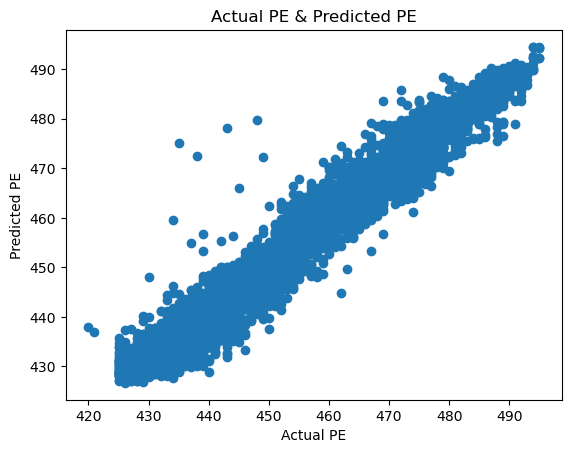

In [26]:
plt.scatter(y_train , y_pred_train_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

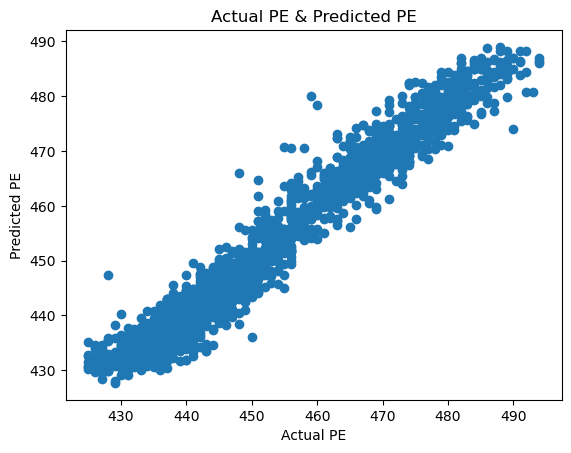

In [27]:
plt.scatter(y_test , y_pred_test_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [28]:
power.head(5)

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


In [29]:
input_data = (8,40,1010,90)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = knn_scaled.predict(input_data_reshape)
print('the pe is ' , prediction[0])

the pe is  475.3333333333333


# Histogram

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'AP'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'PE'}>, <Axes: >]], dtype=object)

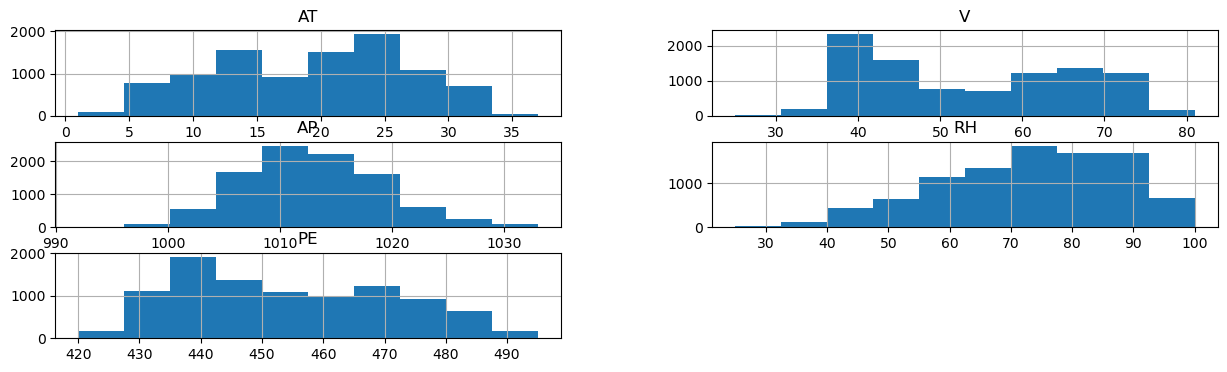

In [30]:
power.hist(figsize=(15,4))